# Downloading data from Google Drive

In [1]:
!pip install gdown


  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for gdown: filename=gdown-4.0.2-py3-none-any.whl size=10598 sha256=a8e8934f4f531c9991c50b4c1a12b648d7e2633d55b7f2c8ea6d51008cccdf99
  Stored in directory: /root/.cache/pip/wheels/75/20/08/4d138cf98df8fe9e14e369c7de79e01c5cabca55b0f58cef3a
Successfully built gdown


In [2]:
#import gdown
# to download the data from Google Drive
# id = 1XKcjj7eEAmgmbHU4Qa7g2fUbHHXRkCBi   ( saber_11_pro.csv)
#url = 'https://drive.google.com/uc?export=download&id=1XKcjj7eEAmgmbHU4Qa7g2fUbHHXRkCBi'
#output = 'saber_11_pro.csv'
#gdown.download(url, output, quiet=False)


In [3]:
#import gdown
# to download the data from Google Drive
# id = 10OhmdA_gI3EDYj0IS0uUKsYDot_IBUnu    (saber_combined_all_fields.csv)
#url ='https://drive.google.com/uc?export=download&id=10OhmdA_gI3EDYj0IS0uUKsYDot_IBUnu'
#output = 'saber_combined_all_fields.csv'
#gdown.download(url, output, quiet=False)

In [4]:
#import gdown
# to download the data from Google Drive
# id = 1HOBcz5K_QfeYavdDl2iCkJGAhlh1SSJV    (saber_combined_all_fields.csv)
#url ='https://drive.google.com/uc?export=download&id=1HOBcz5K_QfeYavdDl2iCkJGAhlh1SSJV'
#output = 'saber_combined_preprocessed.csv'
#gdown.download(url, output, quiet=False)

# Libraries

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import gc

from sklearn.metrics.pairwise import cosine_similarity
from sklearn.model_selection import train_test_split
from sklearn.neighbors import NearestNeighbors
import joblib
import scipy.sparse
from scipy.sparse import csr_matrix
from scipy.sparse.linalg import svds

import plotly.express as px
import plotly.graph_objs as go

from sklearn import preprocessing

from sklearn.feature_selection import SelectKBest, chi2
from sklearn.ensemble import ExtraTreesClassifier, RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, accuracy_score,  r2_score,  f1_score

 
from sklearn import model_selection  # Kfold..
# For ordinal encoding categorical variables, splitting data
from sklearn.preprocessing import OrdinalEncoder

from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error

import warnings; 
warnings.simplefilter('ignore')
pd.set_option('display.max_rows', 500) # to show more rows.




# DF, Dataset : Saber_Combined_Preprocessed

In [6]:
df = pd.read_csv('../input/k/ayoubberdeddouch/colombia-carreer-recosystem/saber_combined_preprocessed.csv')
df.head()

,your_type_of_document,your_nationality,your_gender,your_birthdate,your_foreigner,period,your_consecutive,your_marital_status,your_student,your_country_resides,...,score_biology_saber_11,score_chemistry_saber_11,score_physics_saber_11,score_social_science_saber_11,score_philosophy_saber_11,score_english_saber_11,score_english_saber_11_category,optative_field_saber_11,score_optative_saber_11,optative_category_saber_11
0,TI,COLOMBIA,M,30/07/1996,NO,20134,EK201340233804,Single,STUDENT,COLOMBIA,...,39.0,42.0,33.0,33.0,29.0,38.0,A-,SCORE_INTERDISC_ENVIRONMENT,49.0,UNK
1,CC,COLOMBIA,M,13/04/1994,NO,20133,EK201330220754,Single,STUDENT,COLOMBIA,...,52.0,52.0,54.0,44.0,47.0,51.0,A1,SCORE_DEEPEN_LANGUAGE,6.0,II
2,CC,COLOMBIA,F,08/12/1991,NO,20134,EK201340246502,Single,STUDENT,COLOMBIA,...,50.0,51.0,28.0,46.0,45.0,43.0,A-,SCORE_DEEPEN_BIOLOGY,5.0,I
3,TI,COLOMBIA,F,10/01/1996,NO,20134,EK201340237996,Single,STUDENT,COLOMBIA,...,34.0,35.0,45.0,42.0,40.0,43.0,A-,SCORE_INTERDISC_VIOLENCE_AND_SOC,29.0,UNK
4,CC,COLOMBIA,M,11/10/1995,NO,20173,EK201730119521,Single,STUDENT,COLOMBIA,...,57.0,65.0,44.0,49.0,43.0,42.0,A-,SCORE_INTERDISC_ENVIRONMENT,55.0,UNK


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 212010 entries, 0 to 212009
Data columns (total 98 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   your_type_of_document            212010 non-null  object 
 1   your_nationality                 212010 non-null  object 
 2   your_gender                      212010 non-null  object 
 3   your_birthdate                   212010 non-null  object 
 4   your_foreigner                   212010 non-null  object 
 5   period                           212010 non-null  int64  
 6   your_consecutive                 212010 non-null  object 
 7   your_marital_status              212010 non-null  object 
 8   your_student                     212010 non-null  object 
 9   your_country_resides             212010 non-null  object 
 10  your_have_ethnicity              212010 non-null  object 
 11  your_dept_resides                212010 non-null  object 
 12  yo

In [8]:
df.columns

Index(['your_type_of_document', 'your_nationality', 'your_gender',
       'your_birthdate', 'your_foreigner', 'period', 'your_consecutive',
       'your_marital_status', 'your_student', 'your_country_resides',
       'your_have_ethnicity', 'your_dept_resides', 'your_dept_code_resides',
       'your_municipality_resides', 'your_municipality_code_resides',
       'your_high_school_degree', 'your_tuition_cost_university',
       'your_tuition_pymt_scholarship', 'your_tuition_pymt_credit',
       'your_tuition_pymt_parents', 'your_tuition_pymt_yourself',
       'fami_current_household_type', 'fami_is_the_head_family',
       'fami_econ_dependents', 'fami_father_education',
       'fami_mother_education', 'fami_father_occupation',
       'fami_mother_occupation', 'fami_housing_stratum', 'fami_internet',
       'fami_computer', 'fami_automobile', 'fami_num_books',
       'inst_institution_code', 'inst_institution_name', 'your_prgm_academic',
       'group_reference', 'your_prgm_municipality_

In [9]:
def nan_check(data):
    total = data.isnull().sum().sort_values(ascending=False)
    percent_1 = data.isnull().sum()/data.isnull().count()*100
    percent_2 = (np.round(percent_1, 1)).sort_values(ascending=False)
    missing_data = pd.concat([total, percent_2], axis=1, keys=['Total', '%'])
    return missing_data

nan_check(df)

,Total,%
your_type_of_document,0,0.0
cole_nature,0,0.0
cole_saber_11_icfes_name,0,0.0
cole_saber_11_icfes_dane,0,0.0
cole_saber_11_icfes_code,0,0.0
your_background,0,0.0
your_currently_working,0,0.0
fami_monthly_family_income,0,0.0
fami_dvd,0,0.0
fami_oven,0,0.0


In [10]:
df.describe().T.style.bar(subset=['mean'], color='#FF595E')\
                           .background_gradient(subset=['50%'], cmap='PiYG') # highlight median

,count,mean,std,min,25%,50%,75%,max
period,212010.000000,20170.184156,14.162938,20123.000000,20163.000000,20173.000000,20183.000000,20184.000000
your_dept_code_resides,212010.000000,37.926324,946.696012,5.000000,11.000000,13.000000,52.000000,99999.000000
your_municipality_code_resides,212010.000000,29099.649861,25769.038472,5001.000000,11001.000000,13001.000000,52001.000000,99999.000000
inst_institution_code,212010.000000,3476.782727,3810.251141,1101.000000,1704.000000,1818.000000,2849.000000,129593.000000
your_prgm_municipality_code,212010.000000,27598.687312,25442.052235,5001.000000,11001.000000,11001.000000,52001.000000,99001.000000
your_inst_municipality_code,212010.000000,23531.839177,23418.009068,5001.000000,11001.000000,11001.000000,25175.000000,99001.000000
score_math_saber_pro,212010.000000,124.132469,67.003673,0.000000,100.000000,145.000000,172.000000,300.000000
score_language_saber_pro,212010.000000,125.597165,67.785399,0.000000,101.000000,147.000000,175.000000,300.000000
score_social_science_saber_pro,212010.000000,118.642899,65.291892,0.000000,88.000000,138.000000,168.000000,300.000000
score_english_saber_pro,212010.000000,128.173597,69.784358,0.000000,109.000000,147.000000,179.000000,300.000000


In [11]:
# Categorical features
cat_col=df.select_dtypes(include='object').columns.to_list()
cat_col, len(cat_col)


(['your_type_of_document',
  'your_nationality',
  'your_gender',
  'your_birthdate',
  'your_foreigner',
  'your_consecutive',
  'your_marital_status',
  'your_student',
  'your_country_resides',
  'your_have_ethnicity',
  'your_dept_resides',
  'your_municipality_resides',
  'your_high_school_degree',
  'your_tuition_cost_university',
  'your_tuition_pymt_scholarship',
  'your_tuition_pymt_credit',
  'your_tuition_pymt_parents',
  'your_tuition_pymt_yourself',
  'fami_current_household_type',
  'fami_is_the_head_family',
  'fami_econ_dependents',
  'fami_father_education',
  'fami_mother_education',
  'fami_father_occupation',
  'fami_mother_occupation',
  'fami_housing_stratum',
  'fami_internet',
  'fami_computer',
  'fami_automobile',
  'fami_num_books',
  'inst_institution_name',
  'your_prgm_academic',
  'group_reference',
  'your_prgm_municipality',
  'your_prgm_department',
  'your_prgm_academic_level',
  'your_prgm_method',
  'your_undergraduate_core',
  'your_inst_municipali

In [12]:
# Numerical features
num_col=df.select_dtypes(include='number').columns.to_list()
num_col, len(num_col)

(['period',
  'your_dept_code_resides',
  'your_municipality_code_resides',
  'inst_institution_code',
  'your_prgm_municipality_code',
  'your_inst_municipality_code',
  'score_math_saber_pro',
  'score_language_saber_pro',
  'score_social_science_saber_pro',
  'score_english_saber_pro',
  'score_writing_saber_pro',
  'your_inst_department_code',
  'cole_saber_11_icfes_code',
  'cole_saber_11_icfes_dane',
  'cole_dane_code_campus',
  'cole_municipality_code_location',
  'cole_dept_code_location',
  'score_language_saber_11',
  'score_mathematics_saber_11',
  'score_biology_saber_11',
  'score_chemistry_saber_11',
  'score_physics_saber_11',
  'score_social_science_saber_11',
  'score_philosophy_saber_11',
  'score_english_saber_11',
  'score_optative_saber_11'],
 26)

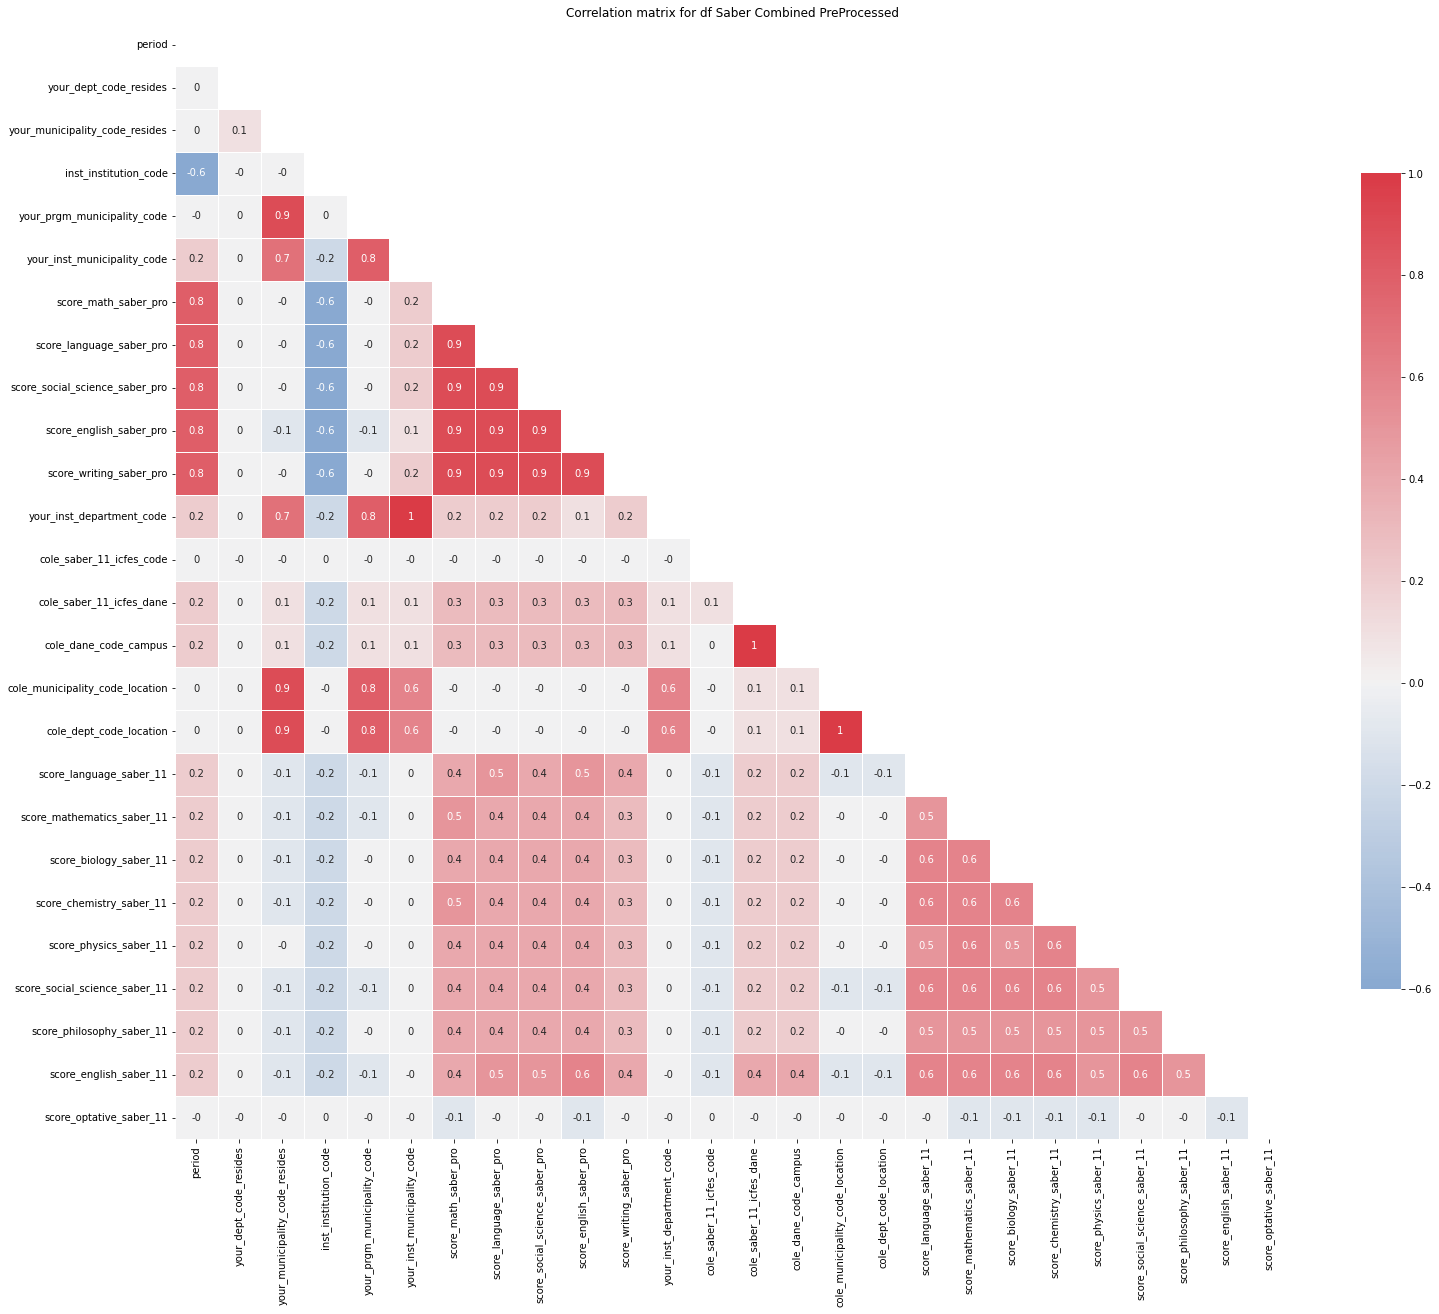

CPU times: user 2.41 s, sys: 203 ms, total: 2.61 s
Wall time: 2.51 s


In [13]:
%%time
### Corralation matrix heatmap
# Getting correlation matrix
cor_matrix = df[num_col].corr().round(1)
mask = np.triu(np.ones_like(cor_matrix, dtype = bool))
# Plotting heatmap 
fig = plt.figure(figsize=(25,25));
plt.title('Correlation matrix for df Saber Combined PreProcessed')
sns.heatmap(cor_matrix, mask=mask, annot=True, center=0,linewidths = .5,square=True,cbar_kws={"shrink": .60}, cmap = sns.diverging_palette(250, 10, as_cmap=True), ax=plt.subplot(111));
plt.show()

# Building the Recommendation System

In [14]:
recsys_df = df.copy()
recsys_df.head()

,your_type_of_document,your_nationality,your_gender,your_birthdate,your_foreigner,period,your_consecutive,your_marital_status,your_student,your_country_resides,...,score_biology_saber_11,score_chemistry_saber_11,score_physics_saber_11,score_social_science_saber_11,score_philosophy_saber_11,score_english_saber_11,score_english_saber_11_category,optative_field_saber_11,score_optative_saber_11,optative_category_saber_11
0,TI,COLOMBIA,M,30/07/1996,NO,20134,EK201340233804,Single,STUDENT,COLOMBIA,...,39.0,42.0,33.0,33.0,29.0,38.0,A-,SCORE_INTERDISC_ENVIRONMENT,49.0,UNK
1,CC,COLOMBIA,M,13/04/1994,NO,20133,EK201330220754,Single,STUDENT,COLOMBIA,...,52.0,52.0,54.0,44.0,47.0,51.0,A1,SCORE_DEEPEN_LANGUAGE,6.0,II
2,CC,COLOMBIA,F,08/12/1991,NO,20134,EK201340246502,Single,STUDENT,COLOMBIA,...,50.0,51.0,28.0,46.0,45.0,43.0,A-,SCORE_DEEPEN_BIOLOGY,5.0,I
3,TI,COLOMBIA,F,10/01/1996,NO,20134,EK201340237996,Single,STUDENT,COLOMBIA,...,34.0,35.0,45.0,42.0,40.0,43.0,A-,SCORE_INTERDISC_VIOLENCE_AND_SOC,29.0,UNK
4,CC,COLOMBIA,M,11/10/1995,NO,20173,EK201730119521,Single,STUDENT,COLOMBIA,...,57.0,65.0,44.0,49.0,43.0,42.0,A-,SCORE_INTERDISC_ENVIRONMENT,55.0,UNK


In [15]:
# Categorical features
cat_col=recsys_df.select_dtypes(include='object').columns.to_list()
cat_col, len(cat_col)


(['your_type_of_document',
  'your_nationality',
  'your_gender',
  'your_birthdate',
  'your_foreigner',
  'your_consecutive',
  'your_marital_status',
  'your_student',
  'your_country_resides',
  'your_have_ethnicity',
  'your_dept_resides',
  'your_municipality_resides',
  'your_high_school_degree',
  'your_tuition_cost_university',
  'your_tuition_pymt_scholarship',
  'your_tuition_pymt_credit',
  'your_tuition_pymt_parents',
  'your_tuition_pymt_yourself',
  'fami_current_household_type',
  'fami_is_the_head_family',
  'fami_econ_dependents',
  'fami_father_education',
  'fami_mother_education',
  'fami_father_occupation',
  'fami_mother_occupation',
  'fami_housing_stratum',
  'fami_internet',
  'fami_computer',
  'fami_automobile',
  'fami_num_books',
  'inst_institution_name',
  'your_prgm_academic',
  'group_reference',
  'your_prgm_municipality',
  'your_prgm_department',
  'your_prgm_academic_level',
  'your_prgm_method',
  'your_undergraduate_core',
  'your_inst_municipali

In [16]:
#%%time
#[' Column : {} with unique: {} --- \n'.format(col,recsys_df[col ].unique()) for col in cat_col]

In [17]:
lst = recsys_df.your_municipality_resides.value_counts()
vals = recsys_df.your_municipality_resides.unique()
df1 = pd.DataFrame(columns=['Count'],index= vals)
df1.Count = lst
df1 = df1.sort_values(by='Count', ascending=False)
### plot bar 
fig = px.bar(df1, x =df1.index , y ="Count" ,title="Municipality Residence",
              color_continuous_scale ='RdBu',color="Count",height=500)
fig.update_xaxes(tickangle=45)
fig.show()



In [18]:

lst = recsys_df.inst_institution_name.value_counts()
vals = recsys_df.inst_institution_name.unique()
df2 = pd.DataFrame(columns=['Count'],index= vals)
df2.Count = lst
df2 = df2.sort_values(by='Count', ascending=False)
### plot bar 
fig = px.bar(df2, x =df2.index , y ="Count" ,title="Institution Name",
              color_continuous_scale ='RdBu',color="Count",height=500)
fig.update_xaxes(tickangle=45)
fig.show()



In [19]:

lst = recsys_df.your_inst_municipality.value_counts()
vals = recsys_df.your_inst_municipality.unique()
df3 = pd.DataFrame(columns=['Count'],index= vals)
df3.Count = lst
df3 = df3.sort_values(by='Count', ascending=False)
### plot bar 
fig = px.bar(df3, x =df3.index , y ="Count" ,title="Institution Municipality Name",
              color_continuous_scale ='RdBu',color="Count",height=500)
fig.update_xaxes(tickangle=45)
fig.show()



These 2 values are the same I think.
**'BOGOTÁ D.C.' == 'BOGOTÁ,**

In [20]:
lst = recsys_df.score_english_saber_11_category.value_counts()
vals = recsys_df.score_english_saber_11_category.unique()
df3 = pd.DataFrame(columns=['Count'],index= vals)
df3.Count = lst
df3 = df3.sort_values(by='Count', ascending=False)
### plot bar 
fig = px.bar(df3, x =df3.index , y ="Count" ,title="Score English Saber_11 Category",
              color_continuous_scale ='RdBu',color="Count",height=500)
fig.update_xaxes(tickangle=45)
fig.show()



In [21]:

lst = recsys_df.your_undergraduate_core.value_counts()
vals = recsys_df.your_undergraduate_core.unique()
df3 = pd.DataFrame(columns=['Count'],index= vals)
df3.Count = lst
df3 = df3.sort_values(by='Count', ascending=False)
### plot bar 
fig = px.bar(df3, x =df3.index , y ="Count" ,title="Your_undergraduate_core",
              color_continuous_scale ='RdBu',color="Count",height=500)
fig.update_xaxes(tickangle=45)
fig.show()



In [22]:

lst = recsys_df.cole_name_campus.value_counts()
vals = recsys_df.cole_name_campus.unique()
df3 = pd.DataFrame(columns=['Count'],index= vals)
df3.Count = lst
df3 = df3.sort_values(by='Count', ascending=False)
### plot bar 
fig = px.bar(df3, x =df3.index , y ="Count" ,title="College Name Campus",
              color_continuous_scale ='RdBu',color="Count",height=500)
fig.update_xaxes(tickangle=45)
fig.show()



In [23]:
# Numerical features
num_col=recsys_df.select_dtypes(include='number').columns.to_list()
num_col, len(num_col)

(['period',
  'your_dept_code_resides',
  'your_municipality_code_resides',
  'inst_institution_code',
  'your_prgm_municipality_code',
  'your_inst_municipality_code',
  'score_math_saber_pro',
  'score_language_saber_pro',
  'score_social_science_saber_pro',
  'score_english_saber_pro',
  'score_writing_saber_pro',
  'your_inst_department_code',
  'cole_saber_11_icfes_code',
  'cole_saber_11_icfes_dane',
  'cole_dane_code_campus',
  'cole_municipality_code_location',
  'cole_dept_code_location',
  'score_language_saber_11',
  'score_mathematics_saber_11',
  'score_biology_saber_11',
  'score_chemistry_saber_11',
  'score_physics_saber_11',
  'score_social_science_saber_11',
  'score_philosophy_saber_11',
  'score_english_saber_11',
  'score_optative_saber_11'],
 26)

In [24]:
features = [
   'score_math_saber_pro',
    'score_language_saber_pro',
    'score_social_science_saber_pro',
    'score_english_saber_pro',
    'score_writing_saber_pro',
    ## 
      'score_language_saber_11',
      'score_mathematics_saber_11',
      'score_biology_saber_11',
      'score_chemistry_saber_11',
      'score_physics_saber_11',
      'score_social_science_saber_11',
      'score_philosophy_saber_11',
      'score_english_saber_11',
]

In [25]:
recsys_df[features].head()

,score_math_saber_pro,score_language_saber_pro,score_social_science_saber_pro,score_english_saber_pro,score_writing_saber_pro,score_language_saber_11,score_mathematics_saber_11,score_biology_saber_11,score_chemistry_saber_11,score_physics_saber_11,score_social_science_saber_11,score_philosophy_saber_11,score_english_saber_11
0,9.6,8.3,8.2,9.4,9.4,32.0,43.0,39.0,42.0,33.0,33.0,29.0,38.0
1,10.8,10.1,11.4,9.6,10.4,48.0,64.0,52.0,52.0,54.0,44.0,47.0,51.0
2,10.6,11.2,10.4,9.5,9.9,57.0,42.0,50.0,51.0,28.0,46.0,45.0,43.0
3,9.3,8.2,9.2,9.5,9.4,40.0,46.0,34.0,35.0,45.0,42.0,40.0,43.0
4,145.0,179.0,118.0,132.0,138.0,48.0,44.0,57.0,65.0,44.0,49.0,43.0,42.0


In [26]:
recsys_df[features].describe().T.style.bar(subset=['mean'], color='#FF595E')\
                           .background_gradient(subset=['50%'], cmap='PiYG') # highlight median

,count,mean,std,min,25%,50%,75%,max
score_math_saber_pro,212010.000000,124.132469,67.003673,0.000000,100.000000,145.000000,172.000000,300.000000
score_language_saber_pro,212010.000000,125.597165,67.785399,0.000000,101.000000,147.000000,175.000000,300.000000
score_social_science_saber_pro,212010.000000,118.642899,65.291892,0.000000,88.000000,138.000000,168.000000,300.000000
score_english_saber_pro,212010.000000,128.173597,69.784358,0.000000,109.000000,147.000000,179.000000,300.000000
score_writing_saber_pro,212010.000000,122.584042,66.305415,6.600000,101.000000,141.000000,167.000000,300.000000
score_language_saber_11,212010.000000,51.457111,7.551992,0.000000,46.000000,52.000000,56.000000,109.000000
score_mathematics_saber_11,212010.000000,51.778789,12.476416,0.000000,43.000000,51.000000,58.000000,127.000000
score_biology_saber_11,212010.000000,49.445092,8.194308,-1.000000,44.000000,49.000000,54.000000,100.000000
score_chemistry_saber_11,212010.000000,50.275350,8.353876,0.000000,45.000000,50.000000,55.000000,95.000000
score_physics_saber_11,212010.000000,48.835602,10.001497,0.000000,43.000000,48.000000,55.000000,124.000000


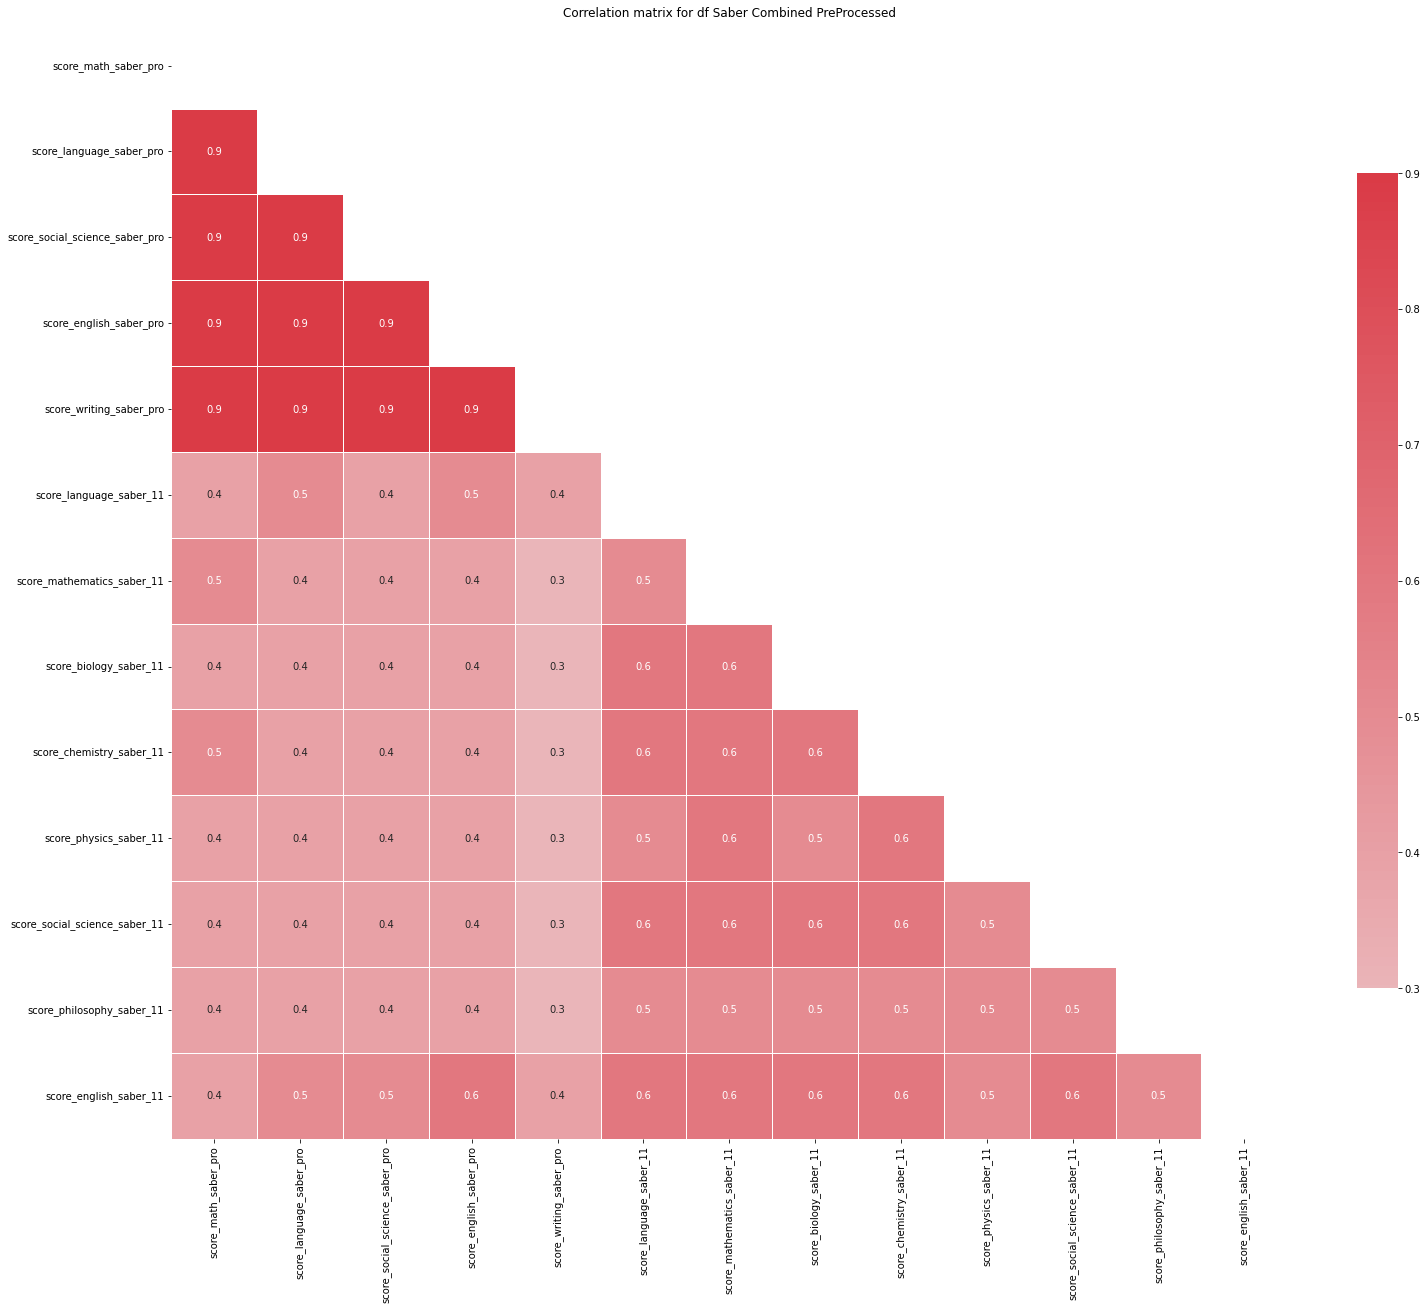

CPU times: user 891 ms, sys: 147 ms, total: 1.04 s
Wall time: 903 ms


In [27]:
%%time
### Corralation matrix heatmap
# Getting correlation matrix
cor_matrix = recsys_df[features].corr().round(1)
mask = np.triu(np.ones_like(cor_matrix, dtype = bool))
# Plotting heatmap 
fig = plt.figure(figsize=(25,25));
plt.title('Correlation matrix for df Saber Combined PreProcessed')
sns.heatmap(cor_matrix, mask=mask, annot=True, center=0,linewidths = .5,square=True,cbar_kws={"shrink": .60}, cmap = sns.diverging_palette(250, 10, as_cmap=True), ax=plt.subplot(111));
plt.show()

These features are all Correlated 0.9
* 'score_math_saber_pro',
*  'score_language_saber_pro',
*  'score_social_science_saber_pro',
*  'score_english_saber_pro',
* 'score_writing_saber_pro',

In [28]:
features = [
    ## 
      'score_language_saber_11',
      'score_mathematics_saber_11',
      'score_biology_saber_11',
      'score_chemistry_saber_11',
      'score_physics_saber_11',
      'score_social_science_saber_11',
      'score_philosophy_saber_11',
      'score_english_saber_11',
]

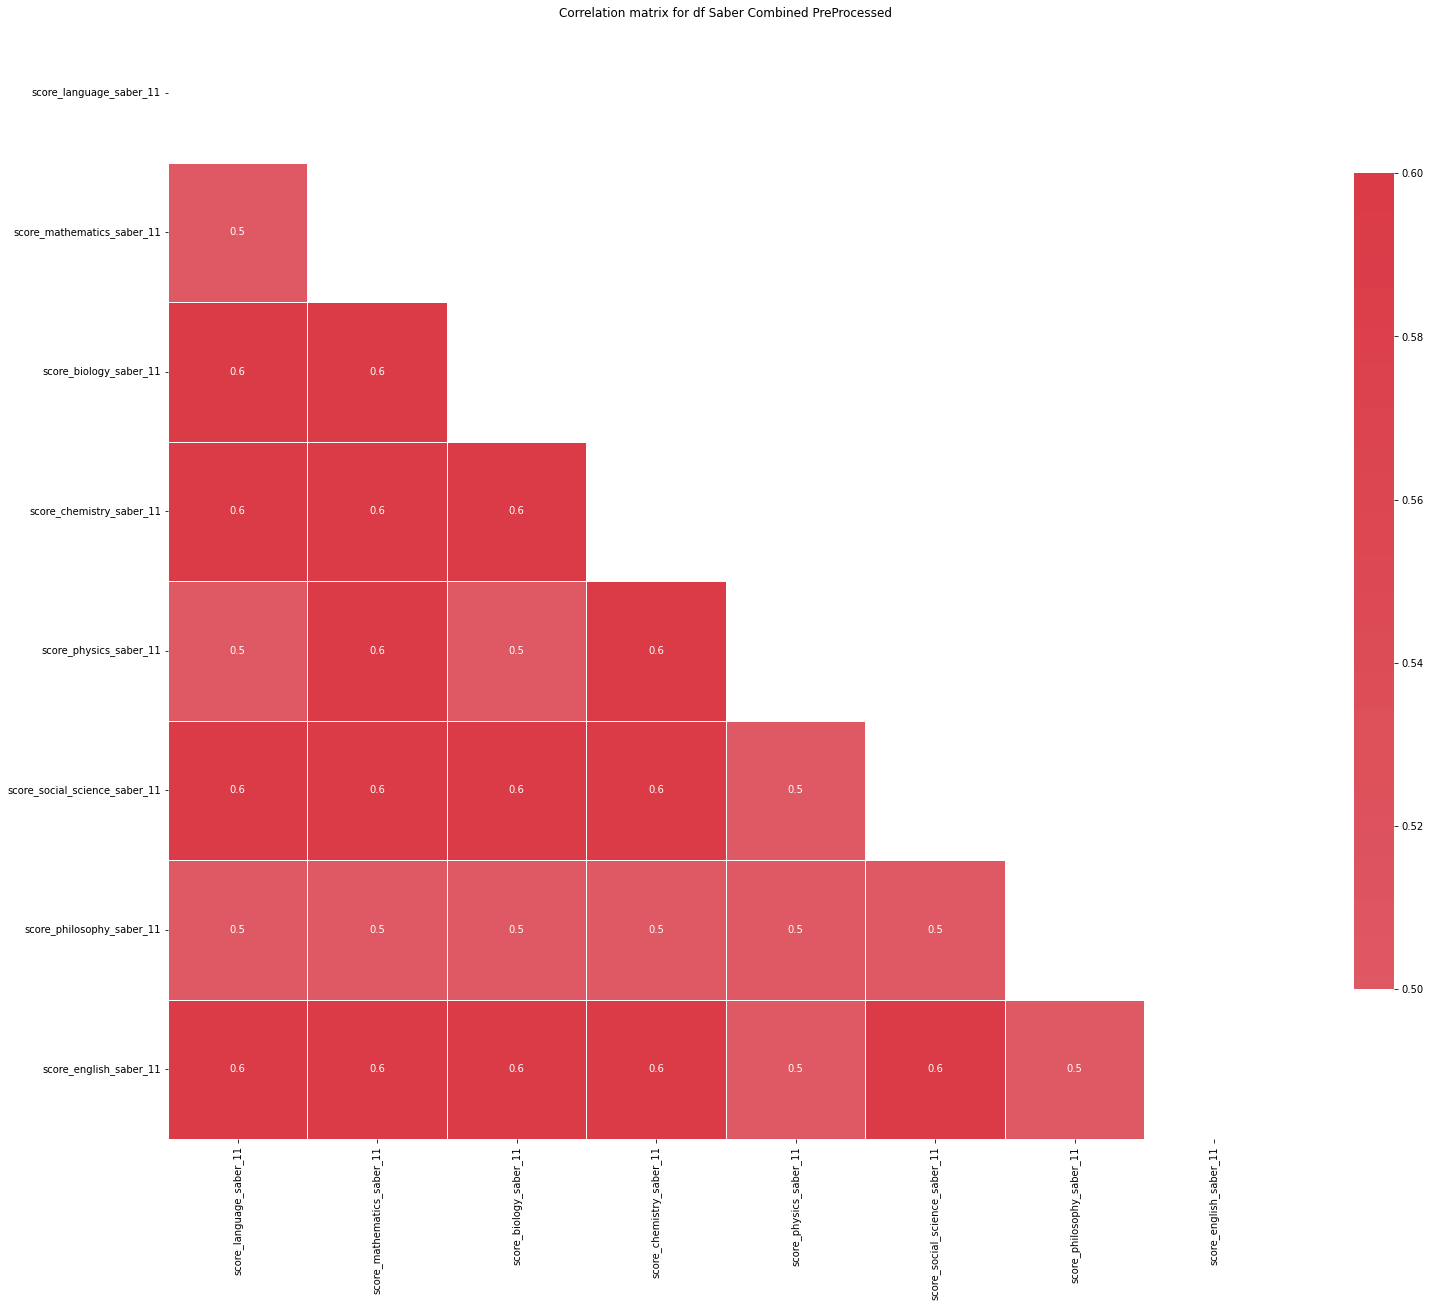

CPU times: user 592 ms, sys: 95 ms, total: 687 ms
Wall time: 553 ms


In [29]:
%%time
### Corralation matrix heatmap
# Getting correlation matrix
cor_matrix = recsys_df[features].corr().round(1)
mask = np.triu(np.ones_like(cor_matrix, dtype = bool))
# Plotting heatmap 
fig = plt.figure(figsize=(25,25));
plt.title('Correlation matrix for df Saber Combined PreProcessed')
sns.heatmap(cor_matrix, mask=mask, annot=True, center=0,linewidths = .5,square=True,cbar_kws={"shrink": .60}, cmap = sns.diverging_palette(250, 10, as_cmap=True), ax=plt.subplot(111));
plt.show()

In [30]:
for var in features:
    print(var.upper() + ' Distribution')
    print(recsys_df[var].describe())
    print('-----')

SCORE_LANGUAGE_SABER_11 Distribution
count    212010.000000
mean         51.457111
std           7.551992
min           0.000000
25%          46.000000
50%          52.000000
75%          56.000000
max         109.000000
Name: score_language_saber_11, dtype: float64
-----
SCORE_MATHEMATICS_SABER_11 Distribution
count    212010.000000
mean         51.778789
std          12.476416
min           0.000000
25%          43.000000
50%          51.000000
75%          58.000000
max         127.000000
Name: score_mathematics_saber_11, dtype: float64
-----
SCORE_BIOLOGY_SABER_11 Distribution
count    212010.000000
mean         49.445092
std           8.194308
min          -1.000000
25%          44.000000
50%          49.000000
75%          54.000000
max         100.000000
Name: score_biology_saber_11, dtype: float64
-----
SCORE_CHEMISTRY_SABER_11 Distribution
count    212010.000000
mean         50.275350
std           8.353876
min           0.000000
25%          45.000000
50%          50.000000
7

Note that the max-min range of all 3 variables are very different from one another. When we do further analysis, like multivariate linear regression, for example, the attributed income will intrinsically influence the result more due to its larger value. Hence, it is important to standardize and normalize the data to bring all variables to the same range.

I use a Robust Scaler (QuantileTransformer): similar to normalization but it instead uses the interquartile range, so that it is robust to outliers.

In [31]:
from sklearn.preprocessing import QuantileTransformer

qt = QuantileTransformer(output_distribution='normal')

In [32]:
recsys_df['score_language_saber_11'] = qt.fit_transform(recsys_df[['score_language_saber_11']].values.reshape(-1,1))
recsys_df['score_mathematics_saber_11'] = qt.fit_transform(recsys_df[['score_mathematics_saber_11']].values.reshape(-1,1))
recsys_df['score_biology_saber_11'] = qt.fit_transform(recsys_df[['score_biology_saber_11']].values.reshape(-1,1))
recsys_df['score_chemistry_saber_11'] = qt.fit_transform(recsys_df[['score_chemistry_saber_11']].values.reshape(-1,1))
recsys_df['score_physics_saber_11'] = qt.fit_transform(recsys_df[['score_physics_saber_11']].values.reshape(-1,1))
recsys_df['score_social_science_saber_11'] = qt.fit_transform(recsys_df[['score_social_science_saber_11']].values.reshape(-1,1))
recsys_df['score_philosophy_saber_11'] = qt.fit_transform(recsys_df[['score_philosophy_saber_11']].values.reshape(-1,1))
recsys_df['score_english_saber_11'] = qt.fit_transform(recsys_df[['score_english_saber_11']].values.reshape(-1,1))

In [33]:
for var in features:
    print(var.upper() + ' Distribution')
    print(recsys_df[var].describe())
    print('-----')

SCORE_LANGUAGE_SABER_11 Distribution
count    212010.000000
mean          0.000581
std           1.000006
min          -5.199338
25%          -0.738089
50%           0.077862
75%           0.651824
max           5.199338
Name: score_language_saber_11, dtype: float64
-----
SCORE_MATHEMATICS_SABER_11 Distribution
count    212010.000000
mean          0.002349
std           1.000535
min          -5.199338
25%          -0.707140
50%           0.005018
75%           0.625670
max           5.199338
Name: score_mathematics_saber_11, dtype: float64
-----
SCORE_BIOLOGY_SABER_11 Distribution
count    212010.000000
mean          0.001657
std           0.999530
min          -5.199338
25%          -0.676854
50%          -0.011291
75%           0.619578
max           5.199338
Name: score_biology_saber_11, dtype: float64
-----
SCORE_CHEMISTRY_SABER_11 Distribution
count    212010.000000
mean          0.000976
std           0.998381
min          -5.199338
25%          -0.641002
50%           0.065284
7

Plot for SCORE_LANGUAGE_SABER_11: total counts = 212010


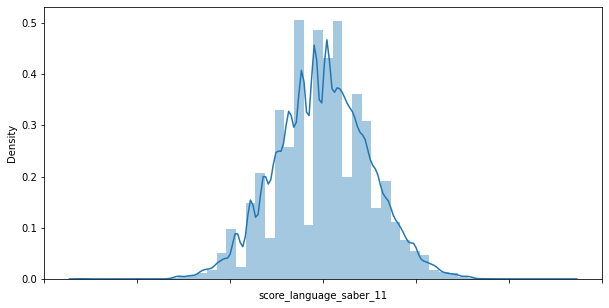

Plot for SCORE_MATHEMATICS_SABER_11: total counts = 212010


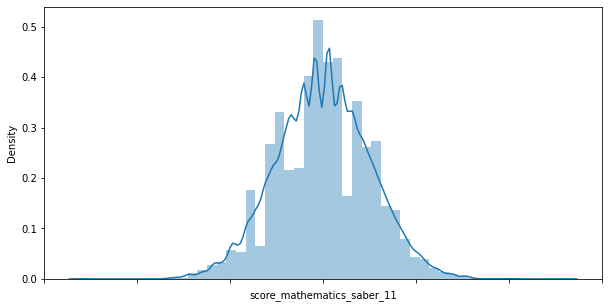

Plot for SCORE_BIOLOGY_SABER_11: total counts = 212010


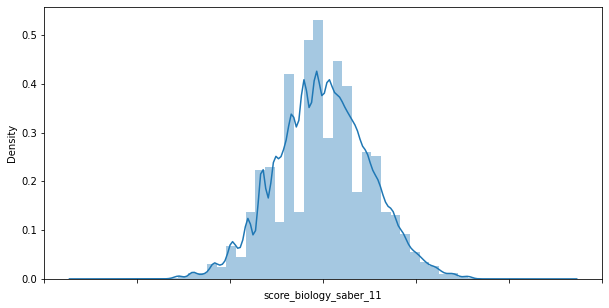

Plot for SCORE_CHEMISTRY_SABER_11: total counts = 212010


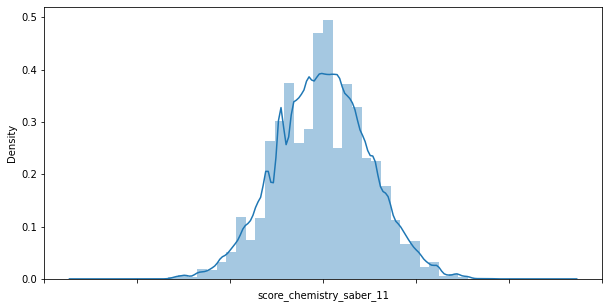

Plot for SCORE_PHYSICS_SABER_11: total counts = 212010


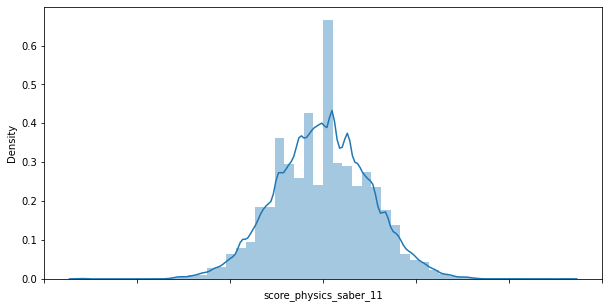

Plot for SCORE_SOCIAL_SCIENCE_SABER_11: total counts = 212010


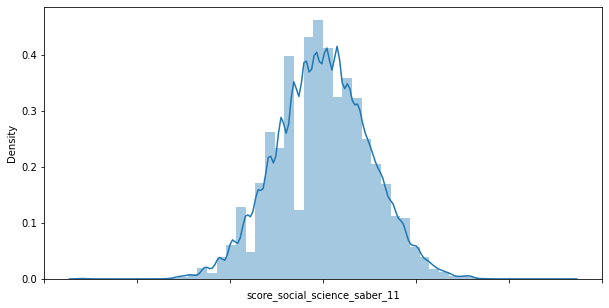

Plot for SCORE_PHILOSOPHY_SABER_11: total counts = 212010


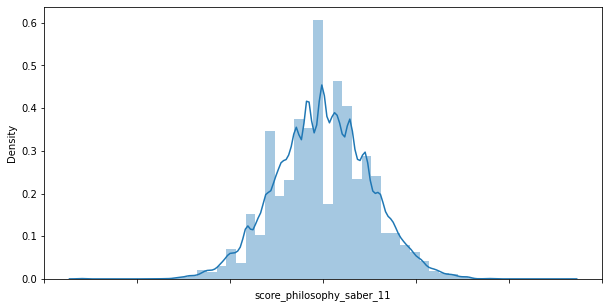

Plot for SCORE_ENGLISH_SABER_11: total counts = 212010


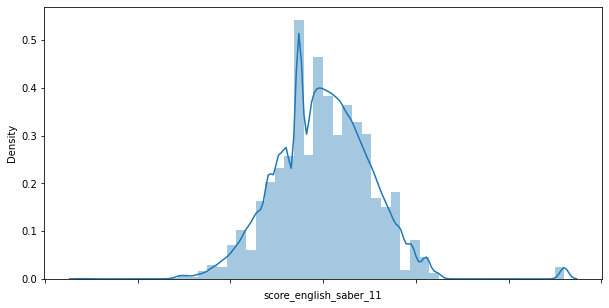

In [34]:
for cat in features:
    cat_num = recsys_df[cat]
    print("Plot for %s: total counts = %d" % (cat.upper(), len(cat_num)))
    f, ax = plt.subplots(figsize=(10,5))
    plot = sns.distplot(cat_num)
    plot.set_xticklabels(plot.get_xticklabels(), rotation=45)
    plt.show()

In [35]:
#create a mapping from labels to a unique integer and vice versa for labelling and prediction later
labels = recsys_df['your_undergraduate_core'].unique()
i = 0
idx2class = {} 
class2idx = {}
for tp in labels:
    idx2class[i] = tp
    class2idx[tp] = i
    i += 1
idx2class

{0: 'PUBLIC ACCOUNTING',
 1: 'MILITARY OR POLICE TRAINING',
 2: 'ECONOMY',
 3: 'ADMINISTRATION',
 4: 'INDUSTRIAL ENGINEERING',
 5: 'AGRONOMIC, LIVESTOCK ENGINEERING',
 6: 'PSYCHOLOGY',
 7: 'SOCIAL COMMUNICATION, JOURNALISM',
 8: 'LAW',
 9: 'GEOLOGY, OTHER NATURAL SCIENCE PROGRAMS',
 10: 'ENVIRONMENTAL, SANITARY ENGINEERING',
 11: 'ADVERTISING',
 12: 'MECHANICAL ENGINEERING',
 13: 'CIVIL ENGINEERING',
 14: 'EDUCATION',
 15: 'SOCIOLOGY, SOCIAL WORK',
 16: 'AGROINDUSTRIAL AND FOOD ENGINEERING',
 17: 'NUTRITION AND DIETETICS',
 18: 'DENTISTRY',
 19: 'ARCHITECTURE',
 20: 'UNKNOWN',
 21: 'ANTHROPOLOGY, LIBERAL ARTS',
 22: 'THERAPIES',
 23: 'CHEMICAL ENGINEERING',
 24: 'OTHER ENGINEERING',
 25: 'VETERINARY MEDICINE',
 26: 'COMPUTER SYSTEMS, TELEMATICS ENGINEERING',
 27: 'ELECTRONIC ENGINEERING, TELECOMMUNICATIONS',
 28: 'MINING, METALLURGY ENGINEERING',
 29: 'DESIGN',
 30: 'NURSING',
 31: 'ADMINISTRATIVE ENGINEERING',
 32: 'BIOLOGY, MICROBIOLOGY',
 33: 'ELECTRICAL ENGINEERING',
 34: 'AGRICULT

In [36]:
class2idx

{'PUBLIC ACCOUNTING': 0,
 'MILITARY OR POLICE TRAINING': 1,
 'ECONOMY': 2,
 'ADMINISTRATION': 3,
 'INDUSTRIAL ENGINEERING': 4,
 'AGRONOMIC, LIVESTOCK ENGINEERING': 5,
 'PSYCHOLOGY': 6,
 'SOCIAL COMMUNICATION, JOURNALISM': 7,
 'LAW': 8,
 'GEOLOGY, OTHER NATURAL SCIENCE PROGRAMS': 9,
 'ENVIRONMENTAL, SANITARY ENGINEERING': 10,
 'ADVERTISING': 11,
 'MECHANICAL ENGINEERING': 12,
 'CIVIL ENGINEERING': 13,
 'EDUCATION': 14,
 'SOCIOLOGY, SOCIAL WORK': 15,
 'AGROINDUSTRIAL AND FOOD ENGINEERING': 16,
 'NUTRITION AND DIETETICS': 17,
 'DENTISTRY': 18,
 'ARCHITECTURE': 19,
 'UNKNOWN': 20,
 'ANTHROPOLOGY, LIBERAL ARTS': 21,
 'THERAPIES': 22,
 'CHEMICAL ENGINEERING': 23,
 'OTHER ENGINEERING': 24,
 'VETERINARY MEDICINE': 25,
 'COMPUTER SYSTEMS, TELEMATICS ENGINEERING': 26,
 'ELECTRONIC ENGINEERING, TELECOMMUNICATIONS': 27,
 'MINING, METALLURGY ENGINEERING': 28,
 'DESIGN': 29,
 'NURSING': 30,
 'ADMINISTRATIVE ENGINEERING': 31,
 'BIOLOGY, MICROBIOLOGY': 32,
 'ELECTRICAL ENGINEERING': 33,
 'AGRICULTURAL

In [37]:
features_train = [
      'score_language_saber_11',
      'score_mathematics_saber_11',
      'score_biology_saber_11',
      'score_chemistry_saber_11',
      'score_physics_saber_11',
      'score_social_science_saber_11',
      'score_philosophy_saber_11',
      'score_english_saber_11',
      # target
     'your_undergraduate_core'
]


In [38]:
recsys = recsys_df[features_train]
recsys.head()

,score_language_saber_11,score_mathematics_saber_11,score_biology_saber_11,score_chemistry_saber_11,score_physics_saber_11,score_social_science_saber_11,score_philosophy_saber_11,score_english_saber_11,your_undergraduate_core
0,-2.611712,-0.707140,-1.315958,-1.090995,-1.756055,-1.968165,-1.805023,-1.327982,PUBLIC ACCOUNTING
1,-0.454249,1.040090,0.373591,0.330873,0.647177,-0.636387,0.232930,0.261387,MILITARY OR POLICE TRAINING
2,0.774833,-0.842694,0.116941,0.196979,-2.225823,-0.393847,-0.022584,-0.522099,PUBLIC ACCOUNTING
3,-1.558482,-0.412900,-1.968165,-2.063775,-0.368215,-0.907080,-0.577557,-0.522099,ECONOMY
4,-0.454249,-0.613509,0.939747,1.639539,-0.503497,-0.043924,-0.194422,-0.781626,ADMINISTRATION


In [39]:
recsys['label'] = recsys['your_undergraduate_core'].replace(class2idx)

In [40]:
recsys.head()

,score_language_saber_11,score_mathematics_saber_11,score_biology_saber_11,score_chemistry_saber_11,score_physics_saber_11,score_social_science_saber_11,score_philosophy_saber_11,score_english_saber_11,your_undergraduate_core,label
0,-2.611712,-0.707140,-1.315958,-1.090995,-1.756055,-1.968165,-1.805023,-1.327982,PUBLIC ACCOUNTING,0
1,-0.454249,1.040090,0.373591,0.330873,0.647177,-0.636387,0.232930,0.261387,MILITARY OR POLICE TRAINING,1
2,0.774833,-0.842694,0.116941,0.196979,-2.225823,-0.393847,-0.022584,-0.522099,PUBLIC ACCOUNTING,0
3,-1.558482,-0.412900,-1.968165,-2.063775,-0.368215,-0.907080,-0.577557,-0.522099,ECONOMY,2
4,-0.454249,-0.613509,0.939747,1.639539,-0.503497,-0.043924,-0.194422,-0.781626,ADMINISTRATION,3


When a dataset is imbalanced, i.e., the distribution of target variables is not uniform, we should make sure that the training-validation split is stratified. This ensures that the distribution of the target variable is preserved in both the training and validation datasets.

In [41]:
def stratified_split(df, target, val_percent=0.2):
    '''
    Function to split a dataframe into train and validation sets, while preserving the ratio of the labels in the target variable
    Inputs:
    - df, the dataframe
    - target, the target variable
    - val_percent, the percentage of validation samples, default 0.2
    Outputs:
    - train_idxs, the indices of the training dataset
    - val_idxs, the indices of the validation dataset
    '''
    classes=list(df[target].unique())
    train_idxs, val_idxs = [], []
    for c in classes:
        idx=list(df[df[target]==c].index)
        np.random.shuffle(idx)
        val_size=int(len(idx)*val_percent)
        val_idxs+=idx[:val_size]
        train_idxs+=idx[val_size:]
    return train_idxs, val_idxs

In [42]:
train_idxs, val_idxs = stratified_split(recsys, 'label', val_percent=0.25)

val_idxs, test_idxs = stratified_split(recsys[recsys.index.isin(val_idxs)], 'label', val_percent=0.5)

In [43]:
def test_stratified(df, col):
    '''
    Analyzes the ratio of different classes in a categorical variable within a dataframe
    Inputs:
    - dataframe
    - categorical column to be analyzed
    Returns: None
    '''
    classes=list(df[col].unique())
    
    for c in classes:
        print(f'Proportion of records with {c}: {len(df[df[col]==c])*1./len(df):0.2} ({len(df[df[col]==c])} / {len(df)})')

In [44]:
print('---------- STRATIFIED SAMPLING REPORT ----------')
print('-------- Label proportions in FULL data --------')
test_stratified(recsys, 'label')
print('-------- Label proportions in TRAIN data --------')
test_stratified(recsys[recsys.index.isin(train_idxs)], 'label')
print('------ Label proportions in VALIDATION data -----')
test_stratified(recsys[recsys.index.isin(val_idxs)], 'label')
print('-------- Label proportions in TEST data ---------')
test_stratified(recsys[recsys.index.isin(test_idxs)], 'label')

---------- STRATIFIED SAMPLING REPORT ----------
-------- Label proportions in FULL data --------
Proportion of records with 0: 0.068 (14334 / 212010)
Proportion of records with 1: 0.01 (2202 / 212010)
Proportion of records with 2: 0.034 (7243 / 212010)
Proportion of records with 3: 0.17 (35790 / 212010)
Proportion of records with 4: 0.05 (10660 / 212010)
Proportion of records with 5: 0.0035 (749 / 212010)
Proportion of records with 6: 0.05 (10518 / 212010)
Proportion of records with 7: 0.035 (7479 / 212010)
Proportion of records with 8: 0.072 (15263 / 212010)
Proportion of records with 9: 0.0027 (565 / 212010)
Proportion of records with 10: 0.039 (8231 / 212010)
Proportion of records with 11: 0.0046 (982 / 212010)
Proportion of records with 12: 0.025 (5382 / 212010)
Proportion of records with 13: 0.036 (7736 / 212010)
Proportion of records with 14: 0.067 (14219 / 212010)
Proportion of records with 15: 0.018 (3832 / 212010)
Proportion of records with 16: 0.0022 (473 / 212010)
Proportio

In [45]:
train_df = recsys[recsys.index.isin(train_idxs)]
X_train = train_df[['score_language_saber_11',
      'score_mathematics_saber_11',
      'score_biology_saber_11',
      'score_chemistry_saber_11',
      'score_physics_saber_11',
      'score_social_science_saber_11',
      'score_philosophy_saber_11',
      'score_english_saber_11',]].values
Y_train = train_df[['label']].values
print('Retrieved Training Data')
val_df = recsys[recsys.index.isin(val_idxs)]
X_val = val_df[['score_language_saber_11',
      'score_mathematics_saber_11',
      'score_biology_saber_11',
      'score_chemistry_saber_11',
      'score_physics_saber_11',
      'score_social_science_saber_11',
      'score_philosophy_saber_11',
      'score_english_saber_11',]].values
Y_val = val_df[['label']].values
print('Retrieved Validation Data')
test_df = recsys[recsys.index.isin(test_idxs)]
X_test = test_df[['score_language_saber_11',
      'score_mathematics_saber_11',
      'score_biology_saber_11',
      'score_chemistry_saber_11',
      'score_physics_saber_11',
      'score_social_science_saber_11',
      'score_philosophy_saber_11',
      'score_english_saber_11',]].values
Y_test = test_df[['label']].values
print('Retrieved Test Data')

Retrieved Training Data
Retrieved Validation Data
Retrieved Test Data


In [46]:
recsys['label'].value_counts()

3     35790
8     15263
0     14334
14    14219
4     10660
6     10518
10     8231
38     8091
13     7736
7      7479
2      7243
26     6805
12     5382
29     5263
19     3969
15     3832
30     3440
27     2845
39     2764
46     2655
22     2575
1      2202
35     2061
23     1853
48     1801
32     1607
28     1226
53     1156
24     1120
25     1077
11      982
33      979
40      972
45      899
42      827
51      817
41      814
49      786
18      763
50      756
5       749
31      709
36      675
37      607
9       565
55      547
47      530
54      528
20      523
16      473
58      469
44      444
21      402
57      392
60      372
43      336
17      325
56      273
62      268
52      264
34      244
63      191
59      168
61      164
Name: label, dtype: int64

# Model Building

For simplicity, I will explore Logistic regression(OneVsRest) as the baseline model and progressively use more complicated ensemble models for our prediction task such as XGBoost.

In [47]:
from sklearn.model_selection import GridSearchCV
#store data, all in numpy arrays
training_data = {'X_train':X_train,'Y_train':Y_train,
                'X_val': X_val,'Y_val':Y_val,
                'X_test': X_test,'Y_test':Y_test}

## Random Forest¶

In [48]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_jobs=None,random_state=27,
                       verbose=1)
clf.fit(training_data['X_train'], training_data['Y_train'].reshape(training_data['Y_train'].shape[0],))

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:   44.2s finished


RandomForestClassifier(random_state=27, verbose=1)

In [49]:
predicted_labels = clf.predict(training_data['X_test'])

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    2.0s finished


In [50]:
accuracy_score(training_data['Y_test'], predicted_labels)

0.15472952553641584

In [51]:
from sklearn.metrics import classification_report
print(classification_report(training_data['Y_test'], predicted_labels))

              precision    recall  f1-score   support

           0       0.12      0.13      0.12      1791
           1       0.00      0.00      0.00       275
           2       0.04      0.02      0.02       905
           3       0.19      0.69      0.30      4473
           4       0.09      0.09      0.09      1332
           5       0.00      0.00      0.00        93
           6       0.08      0.03      0.04      1314
           7       0.11      0.04      0.06       934
           8       0.12      0.14      0.13      1907
           9       0.00      0.00      0.00        70
          10       0.06      0.02      0.03      1028
          11       0.18      0.02      0.03       122
          12       0.10      0.03      0.04       672
          13       0.11      0.10      0.11       967
          14       0.08      0.05      0.06      1777
          15       0.03      0.00      0.00       479
          16       0.40      0.03      0.06        59
          17       0.00    

In [52]:
import xgboost as xgb
# allow logloss and classification error plots for each iteraetion of xgb model
def plot_compare(metrics,eval_results,epochs):
    for m in metrics:
        test_score = eval_results['val'][m]
        train_score = eval_results['train'][m]
        rang = range(0, epochs)
        plt.rcParams["figure.figsize"] = [6,6]
        plt.plot(rang, test_score,"c", label="Val")
        plt.plot(rang, train_score,"orange", label="Train")
        title_name = m + " plot"
        plt.title(title_name)
        plt.xlabel('Iterations')
        plt.ylabel(m)
        lgd = plt.legend()
        plt.show()
        
def fitXgb(sk_model, training_data=training_data,epochs=300):
    print('Fitting model...')
    sk_model.fit(training_data['X_train'], training_data['Y_train'].reshape(training_data['Y_train'].shape[0],))
    print('Fitting done!')
    train = xgb.DMatrix(training_data['X_train'], label=training_data['Y_train'])
    val = xgb.DMatrix(training_data['X_val'], label=training_data['Y_val'])
    params = sk_model.get_xgb_params()
    metrics = ['mlogloss','merror']
    params['eval_metric'] = metrics
    store = {}
    evallist = [(val, 'val'),(train,'train')]
    xgb_model = xgb.train(params, train, epochs, evallist,evals_result=store,verbose_eval=100)
    print('-- Model Report --')
    print('XGBoost Accuracy: '+str(accuracy_score(sk_model.predict(training_data['X_test']), training_data['Y_test'])))
    print('XGBoost F1-Score (Micro): '+str(f1_score(sk_model.predict(training_data['X_test']),training_data['Y_test'],average='micro')))
    plot_compare(metrics,store,epochs)
    features = ['score_language_saber_11', 'score_mathematics_saber_11',
      'score_biology_saber_11',  'score_chemistry_saber_11',
      'score_physics_saber_11',  'score_social_science_saber_11',
      'score_philosophy_saber_11',  'score_english_saber_11']
    f, ax = plt.subplots(figsize=(10,5))
    plot = sns.barplot(x=features, y=sk_model.feature_importances_)
    ax.set_title('Feature Importance')
    plot.set_xticklabels(plot.get_xticklabels(),rotation='vertical')
    plt.show()

### XGBoost hyperparameter tuning with GridSearchCV
#### Initial model

In [53]:
from xgboost.sklearn import XGBClassifier
#initial model
xgb1 = XGBClassifier(learning_rate=0.1,
                    n_estimators=500,
                    max_depth=5,
                    min_child_weight=1,
                    gamma=0,
                    subsample=0.8,
                    colsample_bytree=0.8,
                    #objective='multi:softmax',
                    nthread=4,
                    tree_method='gpu_hist',
                    num_class=64,
                    seed=27)

Fitting model...
[21:58:39] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Fitting done!
[0]	val-mlogloss:3.99799	val-merror:0.83057	train-mlogloss:3.99341	train-merror:0.82748
[100]	val-mlogloss:3.18461	val-merror:0.82857	train-mlogloss:3.00104	train-merror:0.81075
[200]	val-mlogloss:3.19580	val-merror:0.82967	train-mlogloss:2.88445	train-merror:0.79622
[299]	val-mlogloss:3.21023	val-merror:0.83069	train-mlogloss:2.78242	train-merror:0.77833
-- Model Report --
XGBoost Accuracy: 0.17010426110607435
XGBoost F1-Score (Micro): 0.17010426110607435


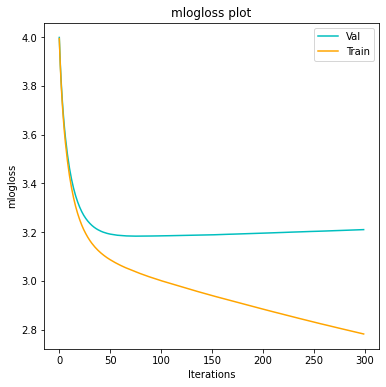

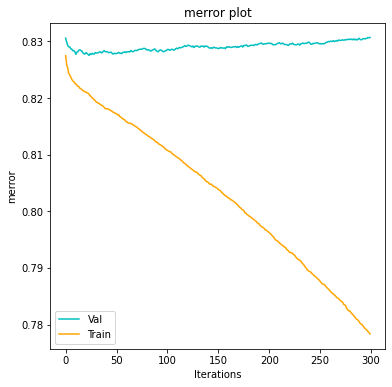

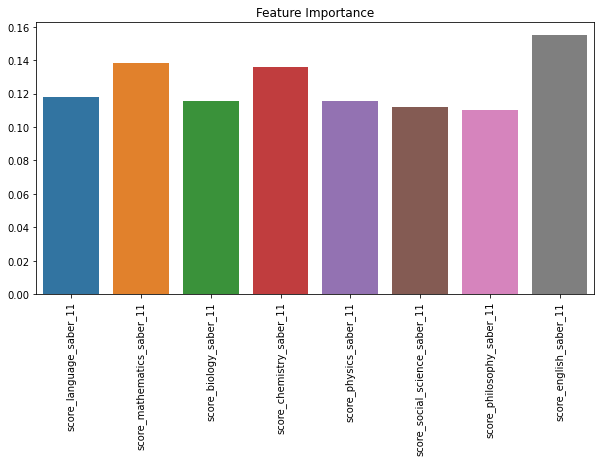

CPU times: user 5min 26s, sys: 5.32 s, total: 5min 31s
Wall time: 4min 16s


In [54]:
%%time
fitXgb(xgb1, training_data)